# Birthday Pairings

- *What is the minimum number of persons required if the probability exceeds 1/2 that two or more have the same birthday?*

_____

- To calculate the probability that two or more have the same birthday, we calculate the probability that they all have distinct birthdays, and take one minus this probability

$$
P(n-\text{distinct birthdays}) = \frac{365}{365}\cdot\frac{364}{365}\cdot ... \cdot \frac{365-n}{365}
$$

- I don't want to calculate these probabilities by hand, so we'll loop through them

In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

In [11]:
x = range(1, 100)
y = []
prob = 1

for x_val in x:
    val = (365 - x_val + 1)/365
    prob *= val
    y.append(prob)

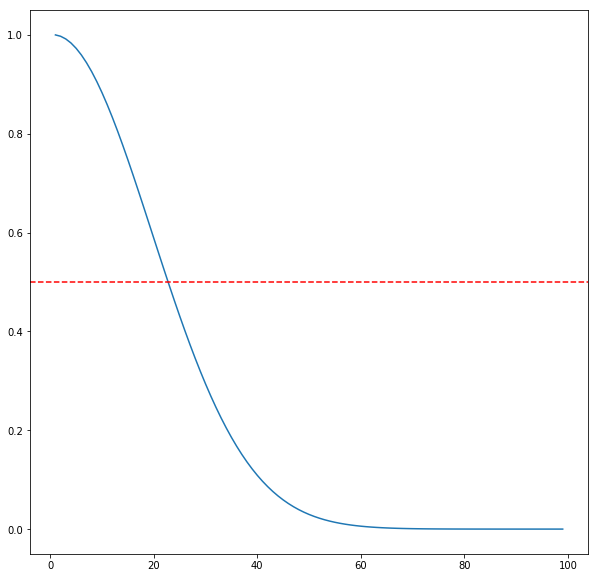

In [13]:
plt.plot(x, y)
plt.axhline(0.5, ls = 'dashed', c = 'r')

- It looks like just around 22 people, the probability crosses 0.5

In [14]:
prob = 1

for i in range(1, 25):
    val = (365 - i + 1)/365
    prob *= val
    if i > 20:
        print(i, prob)

21 0.556311664834794
22 0.5243046923374497
23 0.4927027656760144
24 0.46165574208547105


- As we can see, after adding the 23rd person, the probability of everyone having distinct birthdays drops below 0.5
    - **Therefore, the minimum number of persons required for the probability to  exceed 1/2 that two or more have the same birthday is 23**

_____

- Simulating to tie out

In [28]:
import numpy as np
import pandas as pd

In [34]:
N_TRIALS = 100000

for n in [22, 23, 24]:
    array_random_birthdays = np.random.randint(365, size = (n, N_TRIALS))
    P = (pd.DataFrame(array_random_birthdays).nunique()==n).sum()/N_TRIALS
    print('n={}, P={}'.format(n, P))

n=22, P=0.52347
n=23, P=0.49287
n=24, P=0.46208


- Eyyy